# Técnicas de Inteligencia Artificial - Introducción a Redes Neuronales con Python

Para trabajar con redes neuronales en Python vamos a utilizar la librería SciKit-Learn, al igual que como lo hicimos para árboles de decisión. Si bien, con esta librería podemos crear y entrenar este tipo de modelos, es importante saber que existen otros frameworks especificos para el desarrollo de redes neuronales que nos permiten muchas mas flexibilidad en su diseño y entrenamiento.

---

### Conjunto de datos

Para trabajar y experimentar con redes neuronales vamos a utilizar otro de los dataset incluidos dentro de la librería SciKit-Learn, el cual contiene datos sobre tumores. Para cargar el dataset podemos utilizar la función [`load_breast_cancer`](https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) del modulo `datasets`.

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

dataset = load_digits()
#dataset.target_names = list(map(str, dataset.target_names))
print("Las clases que intentaremos predecir son: {}.".format(dataset.target_names))
print("El formato de la matriz de datos es: {}.".format(dataset.data.shape))
print("El formato de la matriz de eitquetas es: {}.".format(dataset.target.shape))

data_train, data_test, target_train, target_test = train_test_split(dataset.data,
                                                                    dataset.target,
                                                                    test_size = 0.2)
 
print("Ahora, el conjunto de entrenamiento tiene {} muestras y el de evaluación tiene {} muestras.".format(data_train.shape[0], data_test.shape[0]))

Las clases que intentaremos predecir son: [0 1 2 3 4 5 6 7 8 9].
El formato de la matriz de datos es: (1797, 64).
El formato de la matriz de eitquetas es: (1797,).
Ahora, el conjunto de entrenamiento tiene 1437 muestras y el de evaluación tiene 360 muestras.


# Preprocesamiento de datos

Las redes neuronales, a diferencia de otros modelos como los arboles de decisión, solo aceptan entradas en formato numerico. Esta caracteristica puede traer aparejados ciertos problemas en los casos en los que diferentes atributos del mismo conjunto de datos varian sus valores en rangos muy distintos.
Cuando este ocurre, es muy probable que las conexiones de la red que vinculan los atributos que mas varian, predominen en el resultado final sobre las conexiones de los atributos que no lo hacen. Todo esto se ve normalmente reflejado en una falta de capacidad del modelo por aprender, en un estancamiento de las metricas a lo largo de las epocas o, incluso, en una inestabilidad de los resultados a lo largo del entrenamiento o de los distintos entrenamientos.

Para solventar estos problemas, una práctica comun con la mayoria de datasets es aplicar algun tipo de normalización. Para ello, Scikit-Learn nos provee, dentro del módulo [preprocessing](https://scikit-learn.org/1.0/modules/classes.html#module-sklearn.preprocessing) una clase llamada [StandardScaler](https://scikit-learn.org/1.0/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler). Esta clase nos permite obtener una media y desviación estandar de cada atributo en nuestro conjunto de entrenamiento y utilizarlas para normalizar el dataset completo.

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_train)

data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

## Red Neuronal

Para crear, entrenar y evaluar una red neuronal utilizamos la clase [`MLPClassifier`](https://scikit-learn.org/1.0/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier). Al momento de crear la red, la clase nos permite configurar distintos parámetros, entre los que se encuentran:

*  `hidden_layer_sizes`: Lista o tupla de enteros, representando la cantidad de capas ocultas de la red (mediante la cantidad de elementos) y la cantidad de neuronas en cada capa (mediante el valor de cada elemento).
*  `activation`: Función de activación en cada una de las capas de la red.
*  `solver`: Optimizador utilizado para realizar la actualización de los parámetros de la red.
*  `learning_rate_init`: Valor que toma el hiperparametro de learning rate durante el entrenamiento.
*  `max_iter`: Cantidad maxima de iteraciones de entrenamiento.

In [4]:
hidden_layer_sizes = [10, 10]
activation = 'relu'
solver = 'adam'
learning_rate_init = 0.0001
max_iter = 500

In [5]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes,
                          activation = activation,
                          solver = solver,
                          learning_rate_init = learning_rate_init,
                          max_iter = max_iter)

mlp_model.fit(data_train, target_train)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=[10, 10], learning_rate_init=0.0001,
              max_iter=500)

# Evaluación de resultados

Una forma interesante de analizar los resultados del entrenamiento de una red neuronal es mediante gráficas que muestren la evolución de alguna métrica o medida de error en función de las iteraciones de entrenamiento realizadas. 

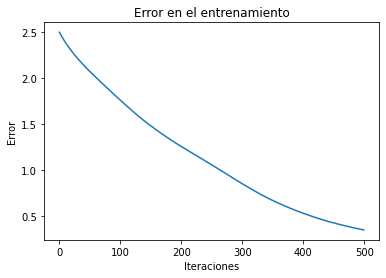

In [6]:
import matplotlib.pyplot as plt

plt.plot(mlp_model.loss_curve_)
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.title("Error en el entrenamiento")
plt.show()

In [7]:
from sklearn.metrics import accuracy_score

target_test_predicted = mlp_model.predict(data_test)

test_accuracy = accuracy_score(target_test, target_test_predicted)

print("El valor de accuracy obtenido sobre el conjunto de evaluación es: {}".format(test_accuracy))

target_train_predicted = mlp_model.predict(data_train)

train_accuracy = accuracy_score(target_train, target_train_predicted)

print("El valor de accuracy obtenido sobre el conjunto de entrenamiento es: {}".format(train_accuracy))

El valor de accuracy obtenido sobre el conjunto de evaluación es: 0.8833333333333333
El valor de accuracy obtenido sobre el conjunto de entrenamiento es: 0.9081419624217119


---
# Tensorflow

Una de las librerías mas usadas para el desarrollo de redes neuronales, sobre todo en Deep Learning, es [Tensorflow](https://www.tensorflow.org/). Esta librería, desarrollada por Google, provee todas las herramientas necesarias para diseñar, entrenar y evaluar modelos de redes neuronales basicos y complejos.

En el siguiente bloque de código, se crea y entrena una red neuronal similar a la implementada mediante Scikit-Learn.

In [8]:
import tensorflow as tf
# En esta sección, realizamos un simple for loop para crear y entrenar distintas redes según los learning-values pedidos.
learning_rate_values = [10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
tensorflow_nn_score_list = []
for i in learning_rate_values: 
  tensorflow_nn = tf.keras.models.Sequential([
                      tf.keras.layers.InputLayer(input_shape=(64)),
                      tf.keras.layers.Dense(10, activation="relu"),
                      tf.keras.layers.Dense(10, activation="relu"),
                      tf.keras.layers.Dense(10, activation="softmax")])

  tensorflow_nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=i),
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    metrics=["accuracy"])

  tensorflow_nn.summary()

  tensorflow_nn_score = tensorflow_nn.fit(data_train,
                                          target_train,
                                          batch_size=16,
                                          epochs=400,
                                          validation_data=(data_test, target_test))
  tensorflow_nn_score_list.append(tensorflow_nn_score)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                650       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 870
Trainable params: 870
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
90/90 [==============================] - 1s 5ms/step - loss: 2968.8406 - accuracy: 0.0967 - val_loss: 3.0225 - val_accuracy: 0.1028
Epoch 2/400
90/90 [==============================] - 0s 2ms/step - loss: 3.9417 - accuracy: 0.0932 - val_loss: 4.2086 - val_accuracy: 0.1000
Epoch 3/400
90/90 [==================

KeyboardInterrupt: ignored

Iteracion con valor: 0.0001 
590
799
0.9388889074325562


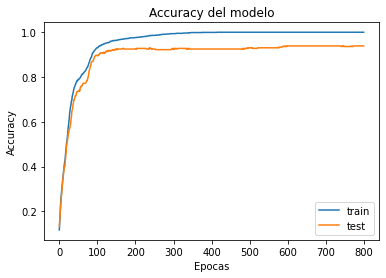

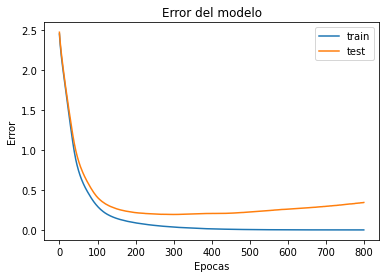

Iteracion con valor: 1e-05 
1198
1199
0.8861111402511597


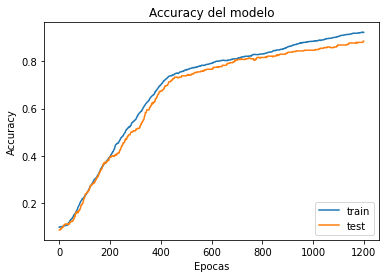

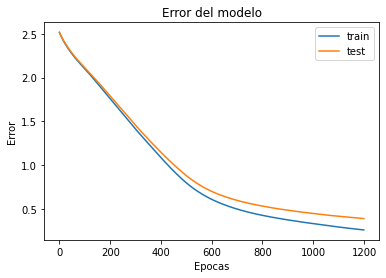

"\n\nimport matplotlib.pyplot as plt\n#copy = tensorflow_nn_score.history['val_accuracy']\n#copy.reverse()\n#print(max(copy))\n#print(copy.index(max(copy)))\na = tensorflow_nn_score.history['val_accuracy']\ninitial_max = a.index(max(a))\nlast_max = (len(a) - a[::-1].index(max(a)) - 1)\n\nb = tensorflow_nn_score.history['accuracy']\nmax_of_maxes = last_max - (b[initial_max:last_max])[::-1].index(max(b[initial_max:last_max]))\n\nprint(initial_max)\nprint(last_max)\nprint(max_of_maxes)\n\nplt.plot(tensorflow_nn_score.history['accuracy'])\nplt.plot(tensorflow_nn_score.history['val_accuracy'])\nplt.title('Accuracy del modelo')\nplt.ylabel('Accuracy')\nplt.xlabel('Epocas')\nplt.legend(['train', 'test'], loc='lower right')\nplt.show()\n\nplt.plot(tensorflow_nn_score.history['loss'])\nplt.plot(tensorflow_nn_score.history['val_loss'])\nplt.title('Error del modelo')\nplt.ylabel('Error')\nplt.xlabel('Epocas')\nplt.legend(['train', 'test'], loc='upper right')\nplt.show()\n"

In [ ]:
import matplotlib.pyplot as plt
# En esta sección, realizamos un simple for loop para evaluar los resultados de la sección anterior.
for i in range(0, len(learning_rate_values)):
  print("Iteracion con valor: {} ".format(learning_rate_values[i]))

  a = tensorflow_nn_score_list[i].history['val_accuracy']
  initial_max = a.index(max(a))
  last_max = (len(a) - a[::-1].index(max(a)) - 1)


  print(initial_max)
  print(last_max)
  print(a[last_max])

  plt.plot(tensorflow_nn_score_list[i].history['accuracy'])
  plt.plot(tensorflow_nn_score_list[i].history['val_accuracy'])
  plt.title('Accuracy del modelo')
  plt.ylabel('Accuracy')
  plt.xlabel('Epocas')
  plt.legend(['train', 'test'], loc='lower right')
  plt.show()

  plt.plot(tensorflow_nn_score_list[i].history['loss'])
  plt.plot(tensorflow_nn_score_list[i].history['val_loss'])
  plt.title('Error del modelo')
  plt.ylabel('Error')
  plt.xlabel('Epocas')
  plt.legend(['train', 'test'], loc='upper right')
  plt.show()
